In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score, silhouette_score, mean_squared_error 
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA

In [2]:
keeper_stats_salaries_df = pd.read_csv('./data/keeper_stats_salaries.csv')

In [3]:
#same as above
keeper_stats_salaries_df.head()

,Unnamed: 0,Player,Club,POS,GP,GS,MINS,SHTS,SV,GA,...,W,L,T,ShO,W%,Sv%,Year,Season,Base Salary,Base Guaranteed Comp.
0,0,Jimmy Nielsen,KC,GK,34,34,3060,102,77,27,...,18,7,9,15,52.9,75.5,2012,reg,200000.0,220000.00
1,1,Donovan Ricketts,MTL,GK,33,33,2913,143,87,52,...,12,14,5,5,36.4,60.8,2012,reg,250000.0,275000.00
2,2,Andy Gruenebaum,CLB,GK,33,33,2920,166,124,41,...,13,12,7,8,39.4,74.7,2012,reg,77000.0,78666.67
3,3,Tally Hall,HOU,GK,33,33,2946,129,88,39,...,14,8,11,12,42.4,68.2,2012,reg,120000.0,129375.00
4,4,Jon Busch,SJ,GK,32,32,2835,123,77,40,...,17,5,9,7,53.1,62.6,2012,reg,155004.0,166337.33


In [4]:
keeper_stats_salaries_df.drop(columns='Unnamed: 0', inplace=True)

In [5]:
keeper_stats_salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Player                 577 non-null    object 
 1   Club                   577 non-null    object 
 2   POS                    577 non-null    object 
 3   GP                     577 non-null    int64  
 4   GS                     577 non-null    int64  
 5   MINS                   577 non-null    int64  
 6   SHTS                   577 non-null    int64  
 7   SV                     577 non-null    int64  
 8   GA                     577 non-null    int64  
 9   GAA                    577 non-null    float64
 10  PKG/A                  577 non-null    object 
 11  W                      577 non-null    int64  
 12  L                      577 non-null    int64  
 13  T                      577 non-null    int64  
 14  ShO                    577 non-null    int64  
 15  W%    

In [6]:
keeper_stats_salaries_df.describe()

,GP,GS,MINS,SHTS,SV,GA,GAA,W,L,T,ShO,W%,Sv%,Year,Base Salary,Base Guaranteed Comp.
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02,5.770000e+02
mean,10.209705,10.114385,909.476603,46.216638,31.079723,14.481802,1.007331,3.847487,3.802426,2.454073,2.490468,21.345754,41.760659,2016.379549,1.363479e+05,1.475517e+05
std,12.326689,12.333928,1107.296156,56.681278,38.640085,17.689944,0.961901,5.205929,4.802249,3.340885,3.518354,23.650362,32.809555,2.643085,1.900329e+05,2.274701e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,3.375000e+04,3.375000e+04
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,6.000000e+04,6.300000e+04
50%,3.000000,3.000000,270.000000,14.000000,8.000000,5.000000,1.100000,1.000000,1.000000,1.000000,0.000000,17.400000,59.600000,2017.000000,8.000000e+04,8.137500e+04
75%,21.000000,21.000000,1890.000000,92.000000,61.000000,28.000000,1.570000,7.000000,7.000000,4.000000,5.000000,40.000000,68.400000,2019.000000,1.500000e+05,1.625625e+05
max,34.000000,34.000000,3060.000000,195.000000,141.000000,64.000000,6.000000,21.000000,19.000000,18.000000,15.000000,100.000000,100.000000,2020.000000,2.100000e+06,2.575000e+06


In [7]:
# Split PKG/A into Penalty kicks conceded and penalty kicks faced.
keeper_stats_salaries_df[['Penalty_Kicks_Conceded', 'Penalty_Kicks_Faced']] = keeper_stats_salaries_df['PKG/A'].str.split('/', expand=True)
keeper_stats_salaries_df['Penalty_Kicks_Conceded'] = keeper_stats_salaries_df['Penalty_Kicks_Conceded'].astype(int)
keeper_stats_salaries_df['Penalty_Kicks_Faced'] = keeper_stats_salaries_df['Penalty_Kicks_Faced'].astype(int)
# Drop unneccessary columns
keeper_stats_salaries_df.drop(columns=['Player', 'Club', 'POS', 'Base Guaranteed Comp.', 'Season', 'PKG/A', 'Year'], inplace=True)


keeper_stats_salaries_df.corr()

,GP,GS,MINS,SHTS,SV,GA,GAA,W,L,T,ShO,W%,Sv%,Base Salary,Penalty_Kicks_Conceded,Penalty_Kicks_Faced
GP,1.000000,0.999636,0.999758,0.982847,0.979800,0.961466,0.369331,0.933513,0.916682,0.905028,0.908880,0.573243,0.644856,0.388306,0.806812,0.840898
GS,0.999636,1.000000,0.999839,0.982521,0.979609,0.960905,0.361863,0.933901,0.915972,0.905170,0.909786,0.570642,0.639866,0.389618,0.804917,0.839410
MINS,0.999758,0.999839,1.000000,0.982804,0.979744,0.961455,0.364357,0.933785,0.916775,0.905235,0.909716,0.571378,0.640479,0.386657,0.806245,0.840951
SHTS,0.982847,0.982521,0.982804,1.000000,0.995737,0.980805,0.400149,0.887934,0.940357,0.880427,0.852788,0.533461,0.634537,0.384963,0.818891,0.850023
SV,0.979800,0.979609,0.979744,0.995737,1.000000,0.959840,0.372745,0.898584,0.920211,0.881102,0.870069,0.543404,0.639134,0.382206,0.804657,0.837970
GA,0.961466,0.960905,0.961455,0.980805,0.959840,1.000000,0.451556,0.841288,0.959471,0.847896,0.791456,0.498906,0.610414,0.386152,0.823678,0.849288
GAA,0.369331,0.361863,0.364357,0.400149,0.372745,0.451556,1.000000,0.268501,0.441324,0.293619,0.227806,0.333768,0.663649,0.174320,0.360421,0.359688
W,0.933513,0.933901,0.933785,0.887934,0.898584,0.841288,0.268501,1.000000,0.753926,0.792367,0.928245,0.661883,0.596516,0.351728,0.731306,0.772744
L,0.916682,0.915972,0.916775,0.940357,0.920211,0.959471,0.441324,0.753926,1.000000,0.762429,0.740324,0.424732,0.588738,0.377089,0.769065,0.792640
T,0.905028,0.905170,0.905235,0.880427,0.881102,0.847896,0.293619,0.792367,0.762429,1.000000,0.834571,0.462533,0.581194,0.331997,0.720094,0.749657


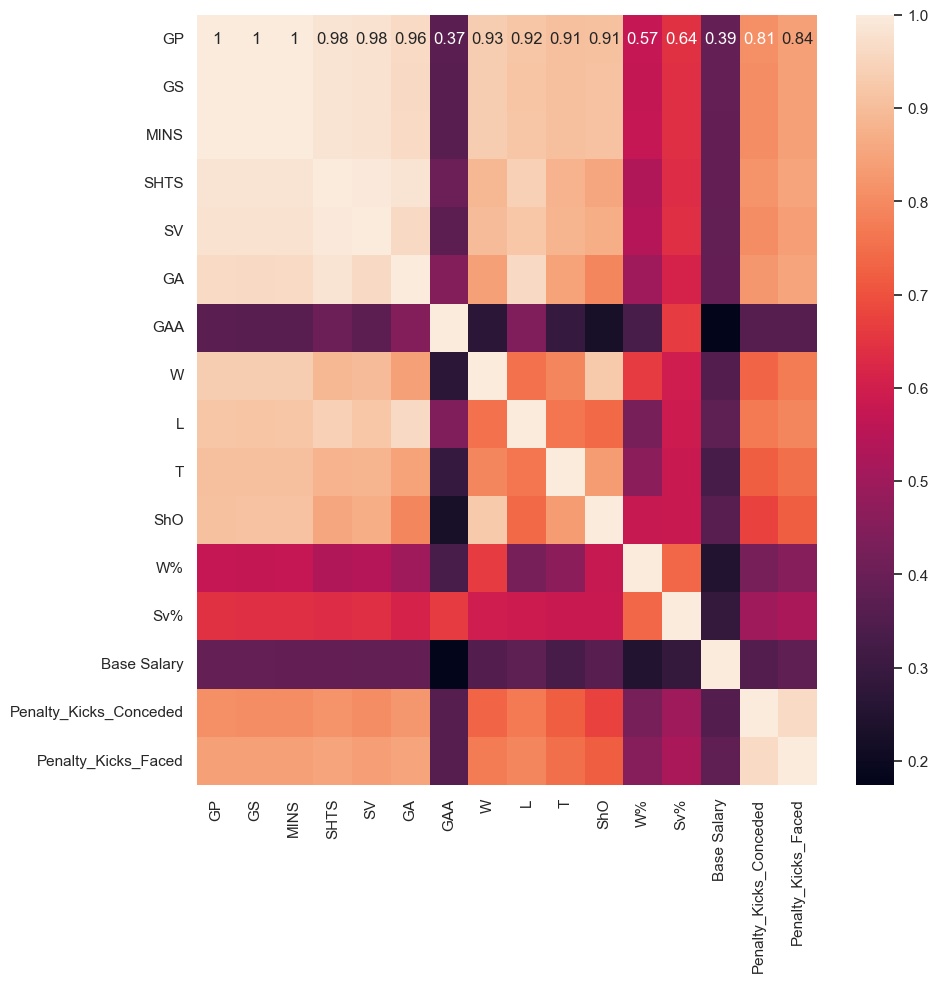

In [8]:
sns.set(rc={'figure.figsize': (10, 10)})

sns.heatmap(keeper_stats_salaries_df.corr(), annot=True);

In [9]:
gk_salary_corrs = keeper_stats_salaries_df.corr()['Base Salary'].map(abs).sort_values(ascending=False)
gk_salary_corrs

Base Salary               1.000000
GS                        0.389618
GP                        0.388306
MINS                      0.386657
GA                        0.386152
SHTS                      0.384963
SV                        0.382206
Penalty_Kicks_Faced       0.379253
L                         0.377089
ShO                       0.364452
Penalty_Kicks_Conceded    0.352864
W                         0.351728
T                         0.331997
Sv%                       0.287895
W%                        0.248889
GAA                       0.174320
Name: Base Salary, dtype: float64

In [10]:
X_g = keeper_stats_salaries_df.drop(columns='Base Salary')
y_g = keeper_stats_salaries_df['Base Salary']

/Users/michaelromanski/anaconda3/envs/streamlit/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelromanski/anaconda3/envs/streamlit/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelromanski/anaconda3/envs/streamlit/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelromanski/anaconda3/envs/streamlit/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categoric

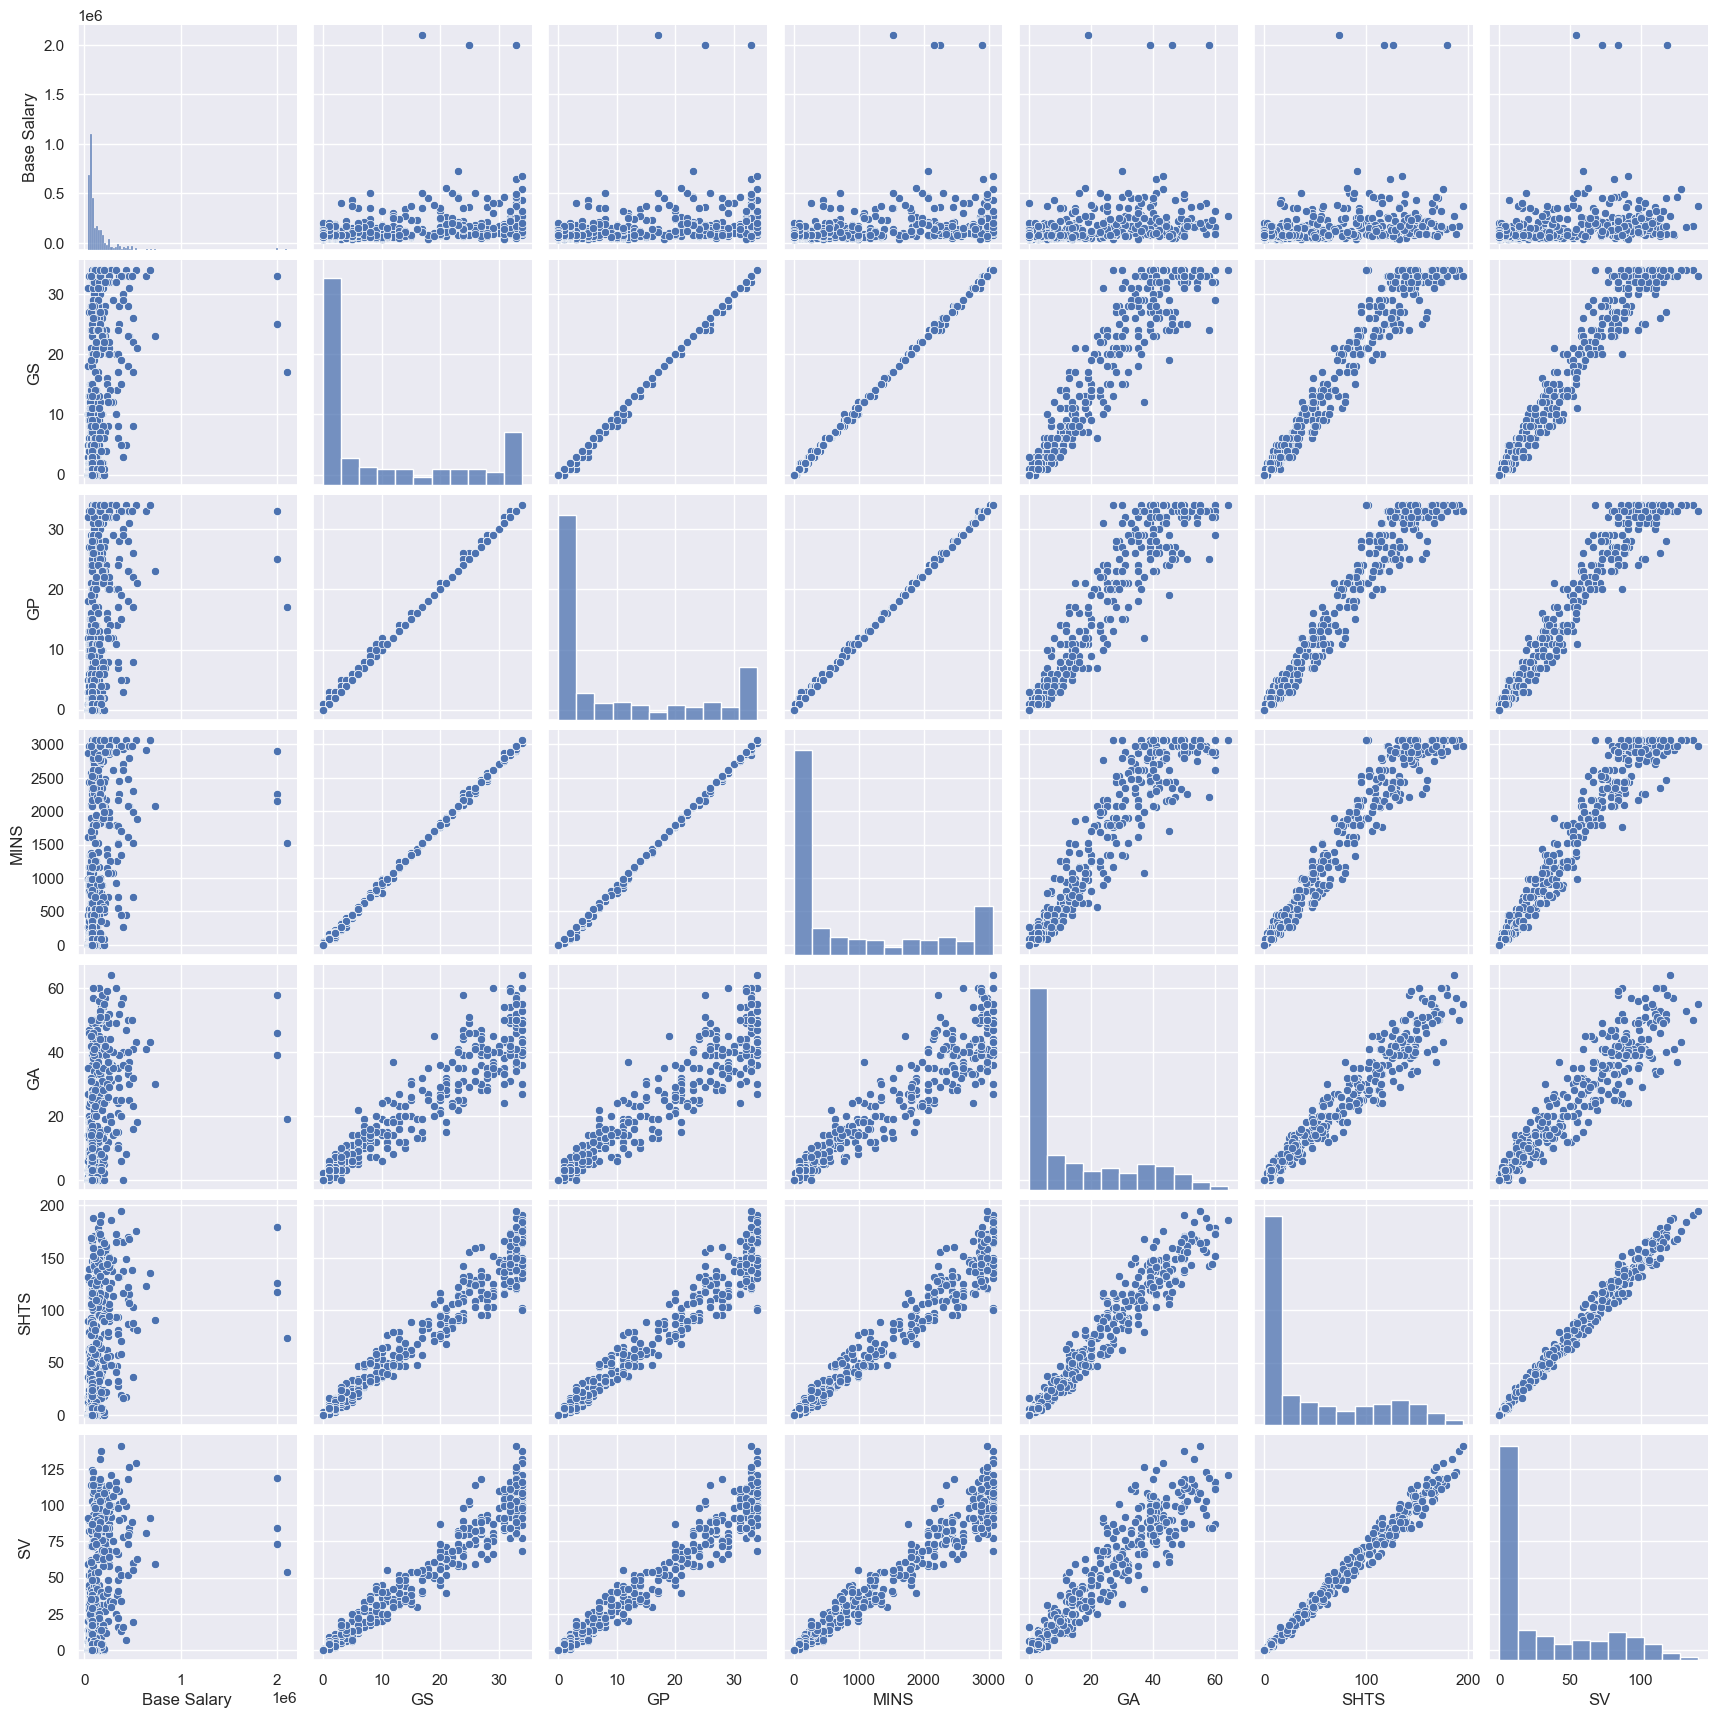

In [11]:
sns.pairplot(keeper_stats_salaries_df, vars=['Base Salary', 'GS', 'GP', 'MINS', 'GA', 'SHTS', 'SV'])
plt.show()

In [12]:
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X_g, y_g, random_state=42)

In [13]:
dummy_reg = DummyRegressor()
dummy_reg.fit(X_train_g, y_train_g)

DummyRegressor()

In [14]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [15]:
dummy_g_mse = np.mean(cross_val_score(dummy_reg, X_train_g, y_train_g, cv=kf, scoring='neg_mean_squared_error'))
dummy_g_mse

-45259902839.89809

In [16]:
dummy_rmse = np.sqrt(-dummy_g_mse)
dummy_rmse

212743.7492381341

In [17]:
y_pred_d = dummy_reg.predict(X_train_g)

dummy_score = r2_score(y_train_g, y_pred_d)
dummy_score

0.0

<Axes: >

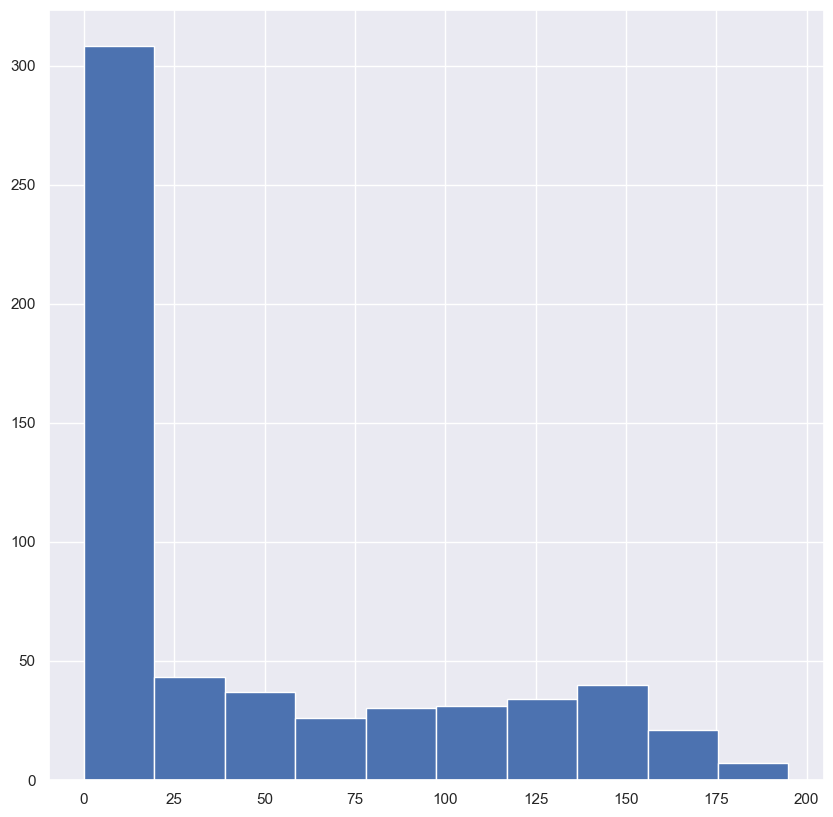

In [21]:
keeper_stats_salaries_df['SHTS'].hist()

In [22]:
norm = Normalizer()
X_train_g_norm = norm.fit_transform(X_train_g)
X_test_g_norm = norm.transform(X_test_g)

In [23]:
lr = LinearRegression()
lr.fit(X_train_g_norm, y_train_g)

LinearRegression()

In [24]:
lr_coef = lr.coef_
lr_coef

array([ 1.85594707e+04,  1.61258117e+07, -1.64215481e+05, -6.50641549e+06,
        6.71289406e+06,  6.84124971e+06, -1.96345590e+06,  6.28767010e+06,
        7.09561784e+06,  4.73827446e+06,  1.54044786e+07,  2.06238592e+04,
       -1.80201844e+05, -1.24178034e+07,  2.59471478e+07])

In [25]:
gk_coef = pd.DataFrame([lr_coef], columns=X_g.columns, index=['Coefficients'])
gk_coef

,GP,GS,MINS,SHTS,SV,GA,GAA,W,L,T,ShO,W%,Sv%,Penalty_Kicks_Conceded,Penalty_Kicks_Faced
Coefficients,18559.470713,1.612581e+07,-164215.481447,-6.506415e+06,6.712894e+06,6.841250e+06,-1.963456e+06,6.287670e+06,7.095618e+06,4.738274e+06,1.540448e+07,20623.859177,-180201.843953,-1.241780e+07,2.594715e+07


In [26]:
y_pred_g = lr.predict(X_train_g_norm)

In [27]:
gk_r2 = r2_score(y_train_g, y_pred_g)
gk_r2

0.14414861899080578

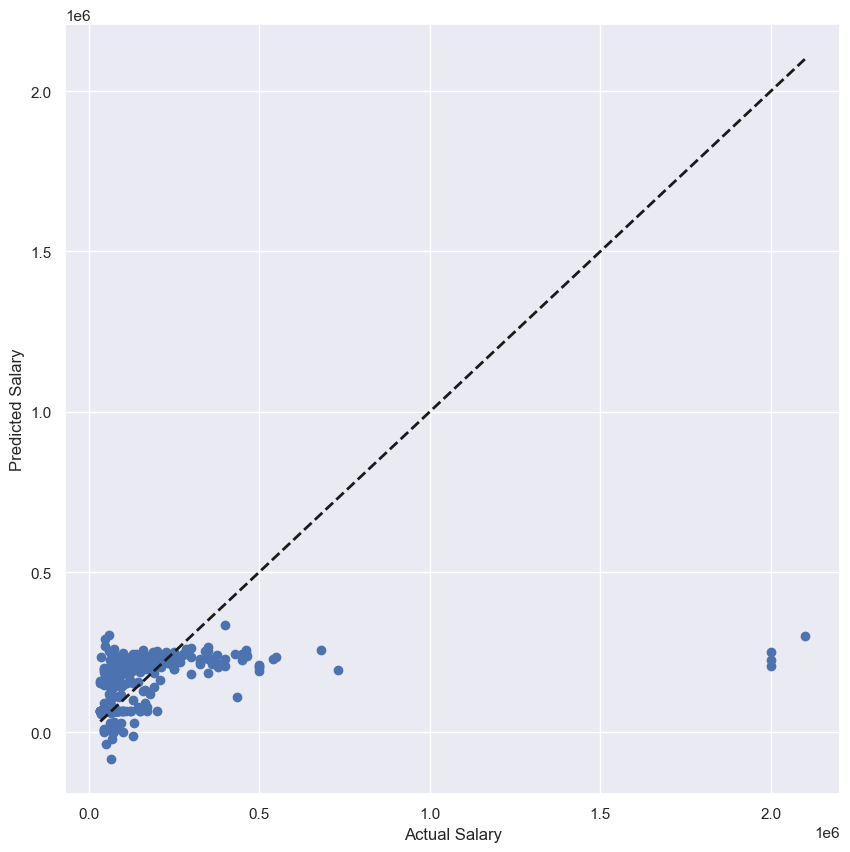

In [28]:
#Outliers seem to be affecting our Linear regression 
plt.scatter(y_train_g, y_pred_g)
plt.plot([y_g.min(), y_g.max()], [y_g.min(), y_g.max()], 'k--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

In [29]:
lr_g_mse = np.mean(cross_val_score(lr, X_train_g_norm, y_train_g, cv=kf, scoring='neg_mean_squared_error'))
lr_g_mse

-40971517666.98097

In [30]:
lr_g_rmse = np.sqrt(-lr_g_mse)
lr_g_rmse

202414.22298588845

In [31]:
q1 = np.percentile(y_g, 25)
q3 = np.percentile(y_g, 75)
iqr = q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [32]:
filtered_keeper_df = keeper_stats_salaries_df[(keeper_stats_salaries_df['Base Salary'] >= lower_bound) & 
                    (keeper_stats_salaries_df['Base Salary'] <= upper_bound)]


In [33]:
X_filtered = filtered_keeper_df.drop(columns='Base Salary')
y_filtered = filtered_keeper_df['Base Salary']


In [34]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_filtered, y_filtered, random_state=42)

In [35]:
X_train_norm_f = norm.fit_transform(X_train_f)
X_test_norm_f = norm.transform(X_test_f)

In [37]:
lr.fit(X_train_norm_f, y_train_f)
y_pred_f = lr.predict(X_train_norm_f)

In [38]:
gkf_r2 = r2_score(y_train_f, y_pred_f)
gkf_r2

0.31958019774219204

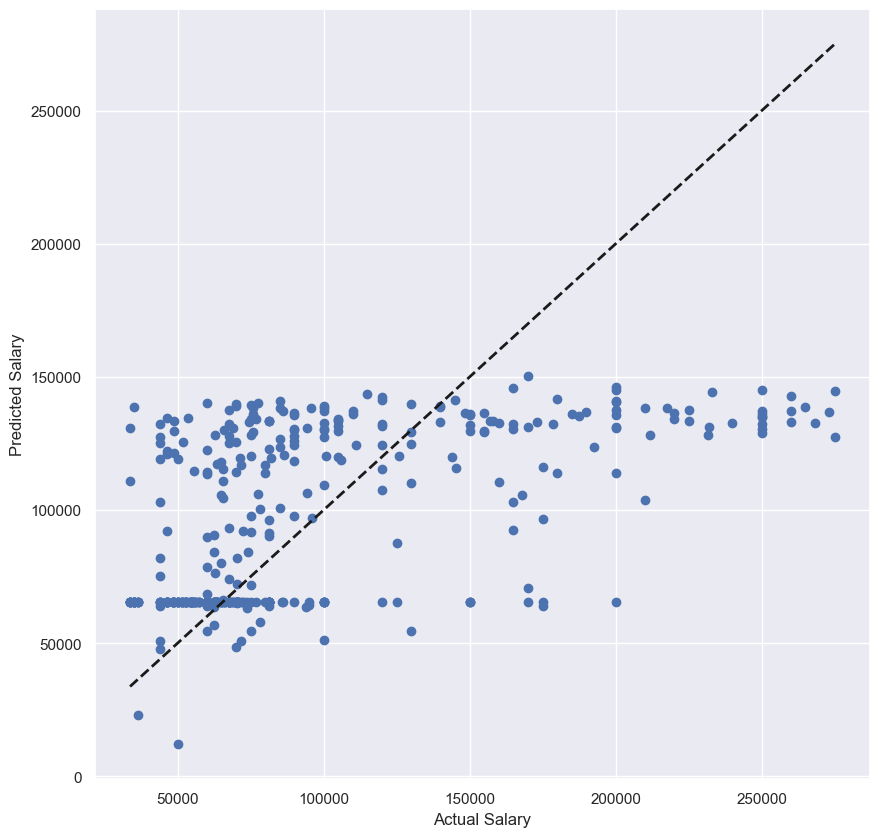

In [39]:
#Removing the outliers giving me a better idea of how the base lr model is doing. It looks as though it seems
# to be predicting on 2 or 3 salaries for the most part. There are different contract levels, this might be it. Maybe
# this is more of a classification problem after all? Something to think about. 
plt.scatter(y_train_f, y_pred_f)
plt.plot([y_filtered.min(), y_filtered.max()], [y_filtered.min(), y_filtered.max()], 'k--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

In [40]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_g, y_train_g)

RandomForestRegressor(random_state=42)

In [41]:
rf_score = np.mean(cross_val_score(rf, X_train_g, y_train_g, cv=5))
rf_score

-0.24049559722109484

In [42]:
pca = PCA(random_state=42)
pca.fit(X_train_g_norm, X_test_g)

PCA(random_state=42)